In [8]:
from cells.hallermann2012 import iteration2
from neuron import h, gui
from helpers.record import *
import numpy as np
import copy
from importlib import reload

reload(iteration2)
config = iteration2.Config()
cellbuilder = lambda: iteration2.SPI6(config)

# Stimulate random traces

Adjust parammaps to your needs

In [5]:
parammaps = [{"delay":100,"dur":500,"amp": -0.2 + i*2*0.025} for i in range(0,10)]
outputs = []

for param in parammaps:
    cell = cellmodule()
    singlepulse = h.IClamp(cell.soma(0.5))
    singlepulse.delay = param["delay"]
    singlepulse.dur = param["dur"]
    singlepulse.amp = param["amp"]

    v_vec = h.Vector()             # Membrane potential vector
    t_vec = h.Vector()  
    v2_vec = h.Vector()# Time stamp vector
    v_vec.record(cell.soma(0.5)._ref_v)
    t_vec.record(h._ref_t)

    h.tstop = 800
    h.run()
    outputs.append({"v": np.array(v_vec), "t": np.array(t_vec)})

# Plot

Plotting the Results


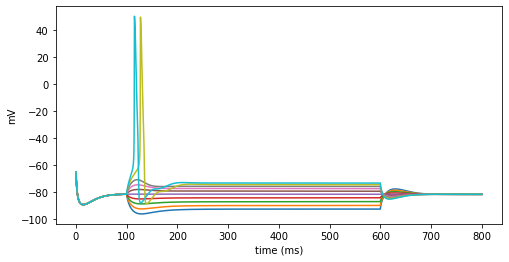

In [6]:
from matplotlib import pyplot
pyplot.figure(figsize=(8,4)) # Default figsize is (8,6)
for el in outputs[0:10]: 
    pyplot.plot(el["t"], el["v"])
pyplot.xlabel('time (ms)')
pyplot.ylabel('mV')
pyplot.show()

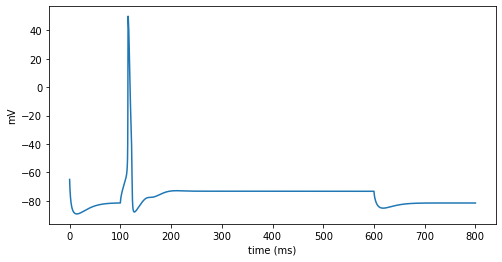

In [7]:
# One Trace
import numpy as np
el = outputs[9]
pyplot.figure(figsize=(8,4)) # Default figsize is (8,6)
pyplot.plot(el["t"], el["v"])
pyplot.xlabel('time (ms)')
pyplot.ylabel('mV')
pyplot.show()